# Hybrid Switching
***
The Hybrid Switching solver is designed to allow a model's species to be represented dynamically as either continuous or stochastic throughout the simulation.  This solver will represent a reaction channel deterministically at high populations in order to favor performance, and will automatically switch to a stochastic representation at lower populations.  This allows for substantial run-time improvements over the SSA, minimizing the loss of stochastic accuracy.  
  
There is no special setup for the standard case of using this switching mechanism, however for cases where a particular species should always be represented as 'stochastic' or always represented as 'continuous,' the GillesPy2.species can be constructed with kwarg 'mode' locking that into place.  

**mode='dynamic'(default) - allows for hybrid switching  
mode='continuous' - forces a species to be modeled continuously/deterministically  
mode='discrete' - forces a species to be modeled discretely/stochastically**  

Ex:  
A = GillesPy2.Species(name='A', initial_value=400, mode='continuous')
***
## Setup the Environment
***

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

MatPlotLib is used for creating custom visualizations

In [3]:
import matplotlib.pyplot as plt

In [4]:
import gillespy2

In [5]:
import gillespy2.solvers.numpy.tau_hybrid_solver

***
## Create the Automatic Switching Model
***

In [6]:
def create_automatic_switch_example(parameter_values=None, tol=None):
    # Initialize Model
    model = gillespy2.Model(name="Automatic Switch Example")

    # Define Variables (GillesPy2.Species)
    if tol is None:
        A = gillespy2.Species(name='A', initial_value=400  )
        B = gillespy2.Species(name='B', initial_value=10000)
        C = gillespy2.Species(name='C', initial_value=10000)
    else:
        A = gillespy2.Species(name='A', initial_value=400  , switch_tol=tol)
        B = gillespy2.Species(name='B', initial_value=10000, switch_tol=tol)
        C = gillespy2.Species(name='C', initial_value=10000, switch_tol=tol)

    # Add Variables to Model
    model.add_species([A, B, C])
    
    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression= 3e-4)
    k2 = gillespy2.Parameter(name='k2', expression= 0.5e-2)
    k3 = gillespy2.Parameter(name='k3', expression = 2e-1)
    
    # Add Parameters to Model
    model.add_parameter([k1, k2, k3])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1",reactants={'A': 1, 'B': 1}, products={'B': 1, 'C': 1}, rate='k1')
    r2 = gillespy2.Reaction(name="r2",reactants={'B': 1}, products={}, rate='k2')
    r3 = gillespy2.Reaction(name="r3",reactants={'C': 1}, products={'A': 1}, rate='k3')

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=600, num_points=601)
    
    # Set Model Timespan
    model.timespan(tspan)
    for k,v in model.listOfSpecies.items():
        print(f"\t{k} tol={v.switch_tol}")
    return model

In [7]:
def create_automatic_switch_min_example(parameter_values=None, max_stoch_pop=100):
    # Initialize Model
    model = gillespy2.Model(name="Automatic Switch Example")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='A', initial_value=400, switch_min=max_stoch_pop)
    B = gillespy2.Species(name='B', initial_value=10000, switch_min=max_stoch_pop)
    C = gillespy2.Species(name='C', initial_value=10000, switch_min=max_stoch_pop)
    
    # Add Variables to Model
    model.add_species([A, B, C])

    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression= 3e-4)
    k2 = gillespy2.Parameter(name='k2', expression= 0.5e-2)
    k3 = gillespy2.Parameter(name='k3', expression = 2e-1)
    
    # Add Parameters to Model
    model.add_parameter([k1, k2, k3])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1",reactants={'A': 1, 'B': 1}, products={'B': 1, 'C': 1}, rate='k1')
    r2 = gillespy2.Reaction(name="r2",reactants={'B': 1}, products={}, rate='k2')
    r3 = gillespy2.Reaction(name="r3",reactants={'C': 1}, products={'A': 1}, rate='k3')

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=600, num_points=601)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

	A tol=0.04
	B tol=0.04
	C tol=0.04
CPU times: user 23.3 s, sys: 164 ms, total: 23.4 s
Wall time: 23.4 s


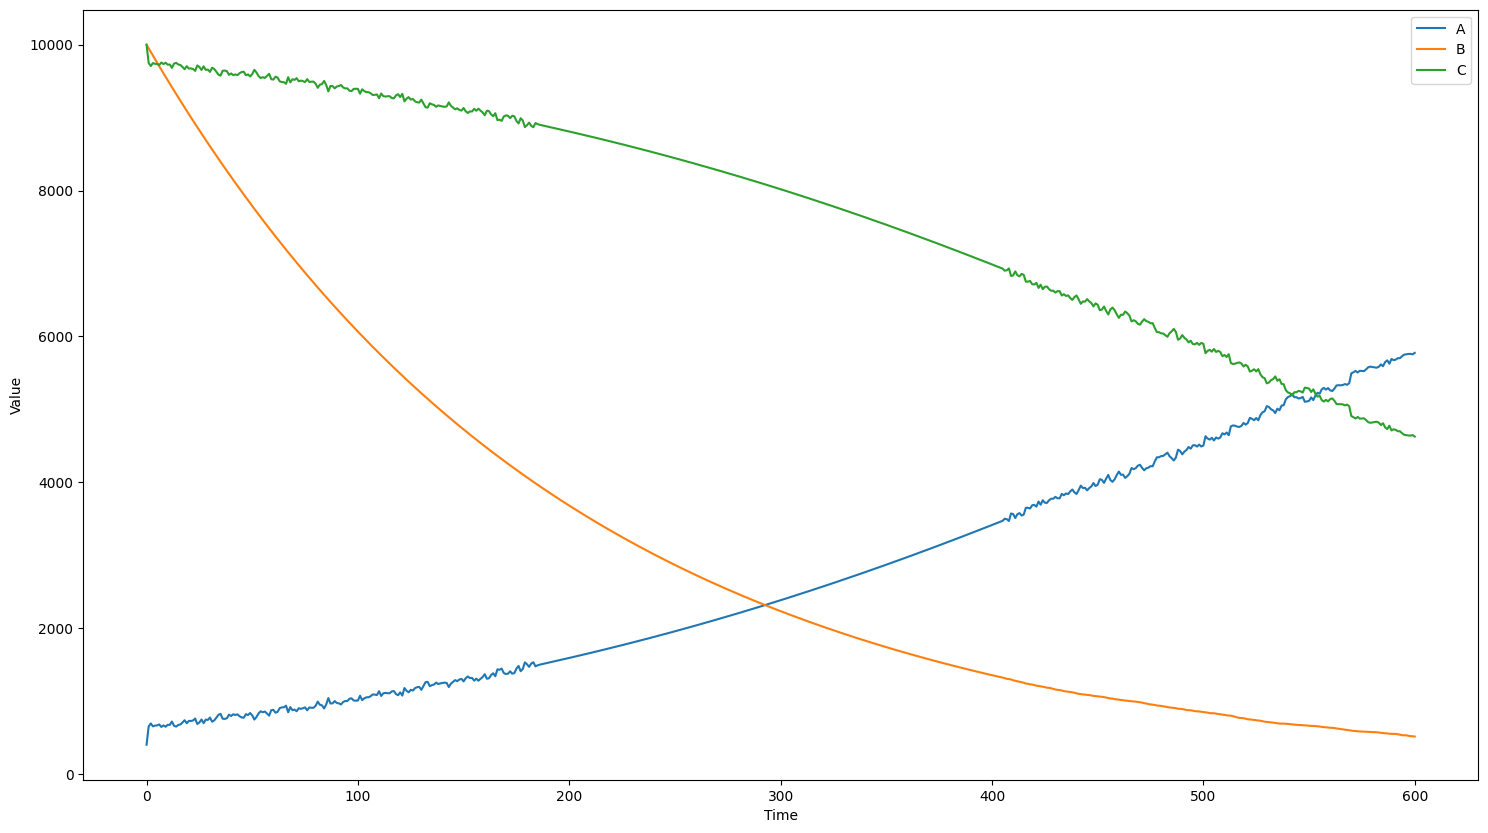

In [8]:
model_cv = create_automatic_switch_example(tol=0.04)
%time resultsP_cv = model_cv.run(solver=gillespy2.TauHybridSolver)
resultsP_cv.plot()

CPU times: user 10.7 ms, sys: 12 ms, total: 22.7 ms
Wall time: 13.7 s


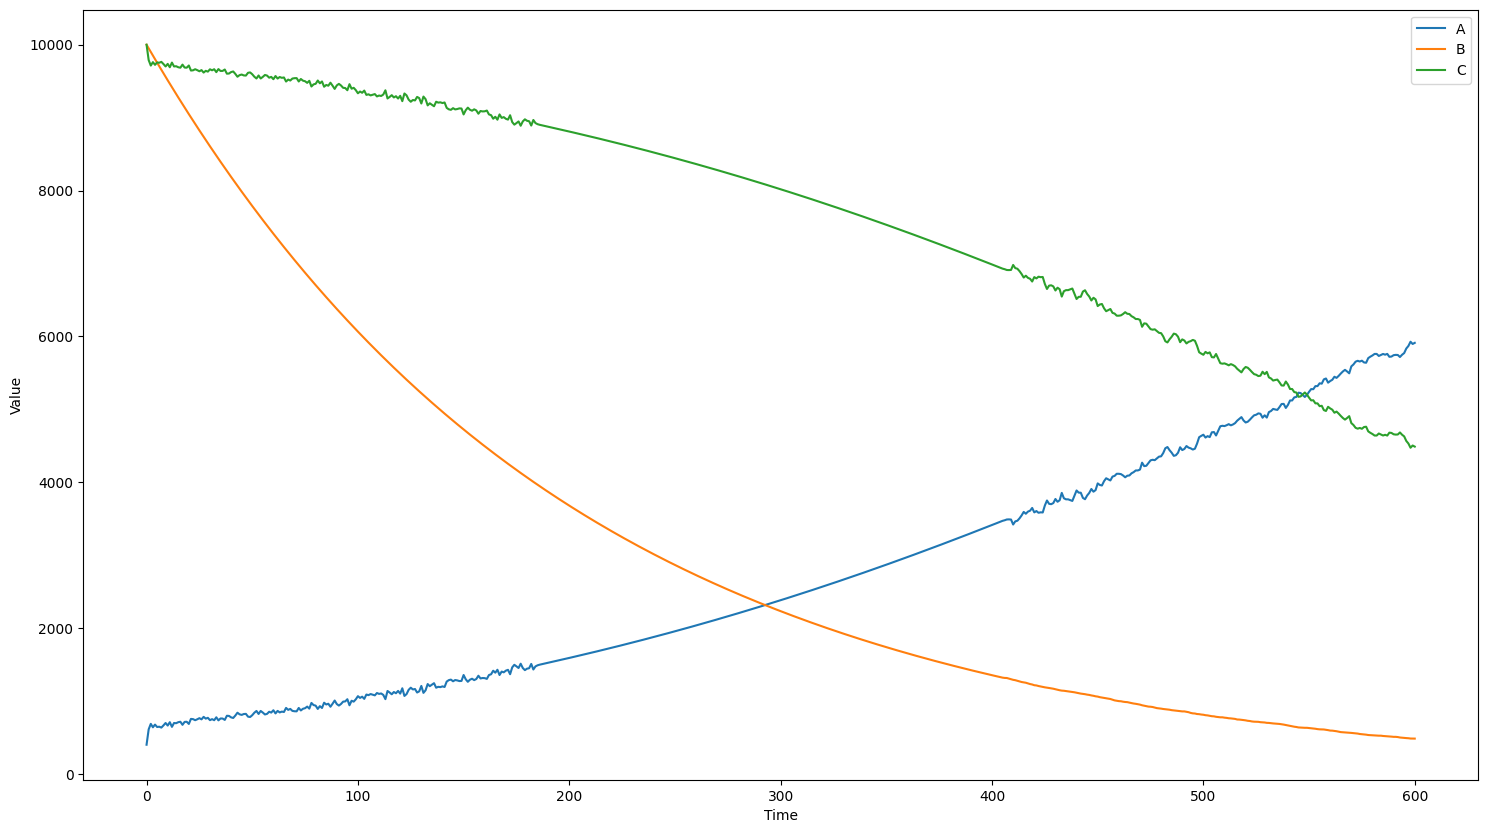

In [9]:
%time resultsC_cv = model_cv.run(solver=gillespy2.TauHybridCSolver)
#solver_cv=gillespy2.TauHybridCSolver(model=model_cv)
#%time resultsC_cv = solver_cv.run()
resultsC_cv.plot()

In [10]:
model_min = create_automatic_switch_min_example(max_stoch_pop=1500)

CPU times: user 23.8 s, sys: 208 ms, total: 24 s
Wall time: 24 s


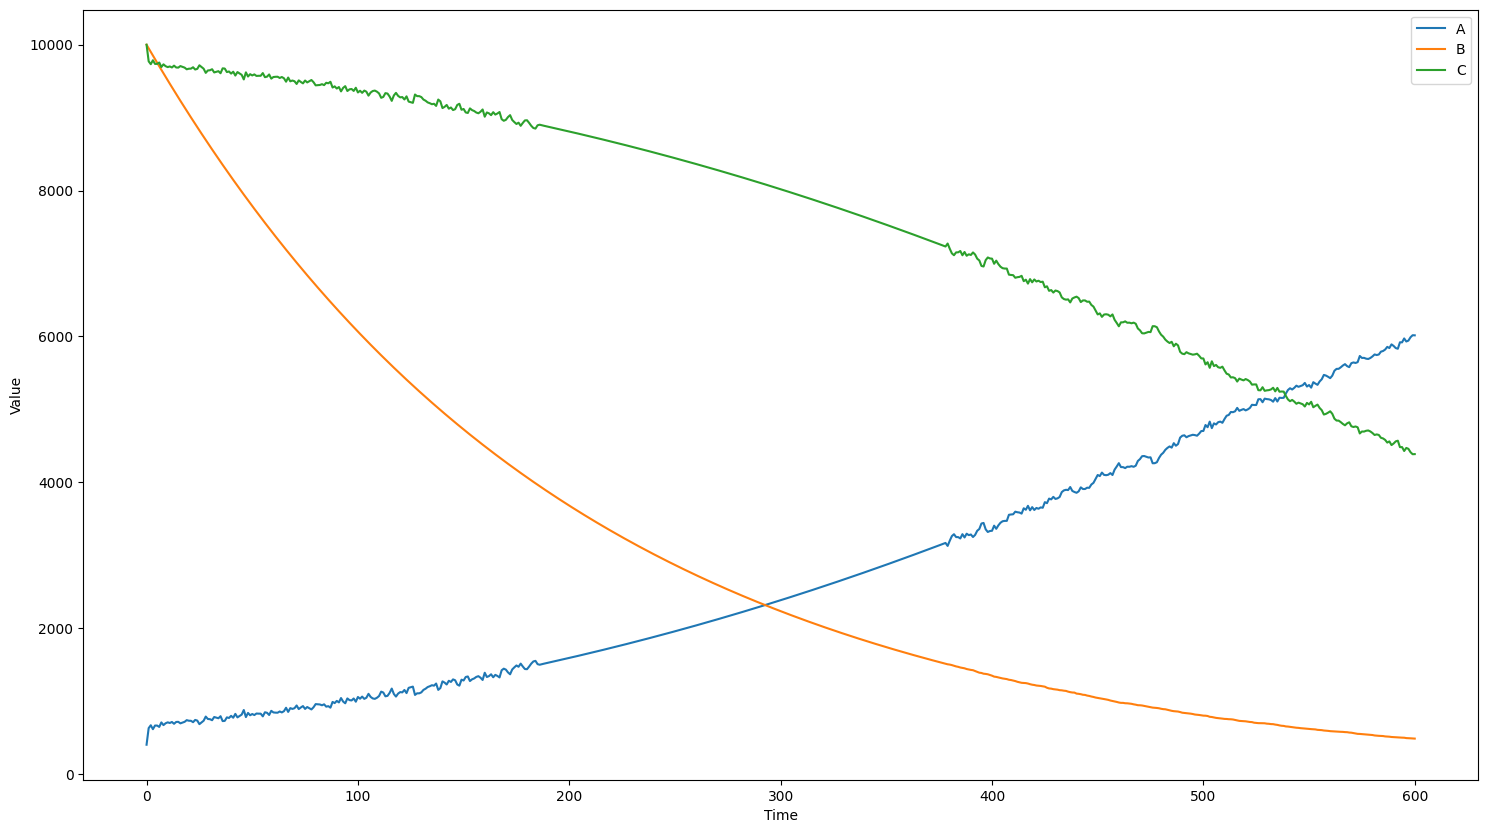

In [11]:
%time resultsP_min = model_min.run(solver=gillespy2.TauHybridSolver)
resultsP_min.plot()

CPU times: user 13.2 ms, sys: 12.1 ms, total: 25.3 ms
Wall time: 13.7 s


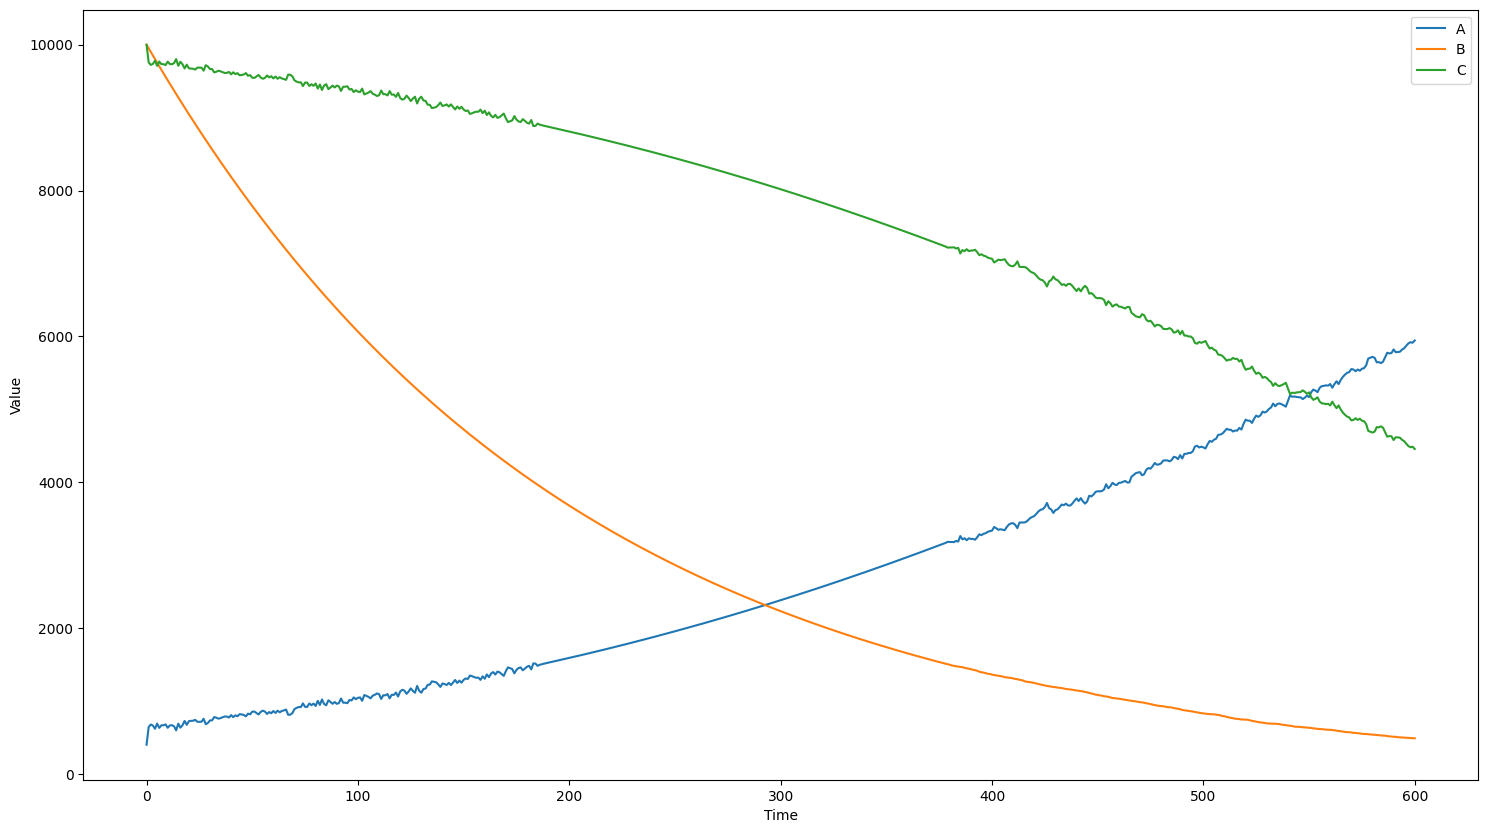

In [12]:
%time resultsC_min = model_min.run(solver=gillespy2.TauHybridCSolver)
#solver=gillespy2.TauHybridCSolver(model=model_min)
#%time resultsC_min = solver.run()             
resultsC_min.plot()